In [55]:
from math import prod
import numpy as np
import matplotlib.pyplot as plt

In [15]:
tiles = {}
with open("20_input.txt", "r") as f:
    tile_list = f.read().strip().split("\n\n")
    for tile in tile_list:
        left, right = tile.split(":\n")
        n = int(left.split(" ")[1])
        np_tile = np.array(
            [[1 if c == "#" else 0 for c in row] for row in right.split("\n")]
        )
        tiles[n] = np_tile

In [16]:
def transform_tiles(tile):
    ttiles = [np.rot90(tile, k) for k in range(0, 4)]
    ttiles.extend([np.rot90(np.fliplr(tile), k) for k in range(0, 4)])
    return ttiles

def find_adjacent(m, dir, tiles):
    tile = tiles[m]
    for n, tile2 in tiles.items():
        if n == m:
            continue
        for ttile2 in transform_tiles(tile2):
            if dir == "left" and np.all(tile[:, 0] == ttile2[:, -1]):
                return n, ttile2
            if dir == "right" and np.all(tile[:, -1] == ttile2[:, 0]):
                return n, ttile2
            if dir == "up" and np.all(tile[0, :] == ttile2[-1, :]):
                return n, ttile2
            if dir == "down" and np.all(tile[-1, :] == ttile2[0, :]):
                return n, ttile2
    return None

In [17]:
dirs = ["left", "right", "up", "down"]
dir_ixs = [0, 1, 2, 3]
neighbors= {}
tile_ns = list(tiles.keys())
for n in tile_ns:
    neighbors[n] = [None] * 4
    for dir, dir_ix in zip(dirs, dir_ixs):
        adjacent = find_adjacent(n, dir, tiles)
        if adjacent is not None:
            adjacent_n, adjacent_tile = adjacent
            neighbors[n][dir_ix] = adjacent_n
            tiles[adjacent_n] = adjacent_tile

In [18]:
prod(n for n, adj in neighbors.items() if sum(x is None for x in adj) == 2)

68781323018729

In [23]:
def get_dir_trans(tile_n, neighbor):
    tile = flipped_tiles[tile_n]
    tile2 = tiles[neighbor]
    for ttile2 in transform_tiles(tile2):
        if np.all(tile[:, 0] == ttile2[:, -1]):
            return 0, -1, ttile2
        if np.all(tile[:, -1] == ttile2[:, 0]):
            return 0, 1, ttile2
        if np.all(tile[0, :] == ttile2[-1, :]):
            return -1, 0, ttile2
        if np.all(tile[-1, :] == ttile2[0, :]):
            return 1, 0, ttile2
    raise ValueError("Neighbor not found")

grid = {}
stack = [(0, 0, 1559)]
visited = set()
flipped_tiles = {1559: tiles[1559]}
while stack:
    i, j, tile_n = stack.pop()
    if tile_n in visited:
        continue
    visited.add(tile_n)
    grid[i, j] = tile_n
    for neighbor in neighbors[tile_n]:
        if neighbor is not None and neighbor not in visited:
            di, dj, tile_neighbor = get_dir_trans(tile_n, neighbor)
            flipped_tiles[neighbor] = tile_neighbor
            stack.append((i + di, j + dj, neighbor))

In [39]:
image = np.zeros((96, 96))
i_min = min(x[0] for x in grid)
i_max = max(x[0] for x in grid)
j_min = min(x[1] for x in grid)
j_max = max(x[1] for x in grid)

In [40]:
i_min, i_max, j_min, j_max

(-5, 6, 0, 11)

In [51]:
for di in range(12):
    for dj in range(12):
        i = i_min + di
        j = j_min + dj
        tile_n = grid[i, j]
        tile = flipped_tiles[tile_n][1:-1, 1:-1]
        i_ix = [ii + 8 * di for ii in range(8)]
        j_ix = [jj + 8 * dj for jj in range(8)]
        image[8*di:8*di+8, 8*dj:8*dj+8] = tile

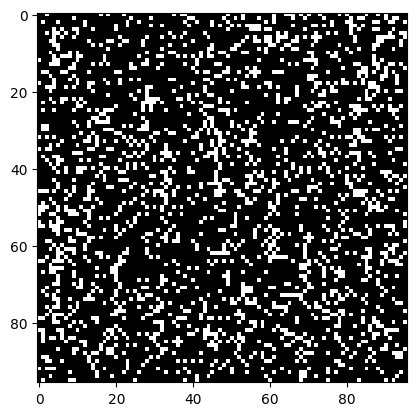

In [57]:
plt.imshow(image, cmap="gray")

In [59]:
monster = [
    (0, 18),
    (1, 0), (1, 5), (1, 6), (1, 11), (1, 12), (1, 17), (1, 18), (1, 19),
    (2, 1), (2, 4), (2, 7), (2, 10), (2, 13), (2, 16)
]

In [63]:
monsters = []
for image_trans in transform_tiles(image):
    monster_count = 0
    for i in range(95 - 2):
        for j in range(1, 95 - 19):
            c = 0
            for di, dj in monster:
                if image_trans[i + di, j + dj]:
                    c += 1
            if c == 15:
                monster_count += 1
    monsters.append(monster_count)

In [64]:
monsters

[0, 0, 0, 0, 0, 0, 0, 19]

In [68]:
sum(sum(image)) - 19 * 15

np.float64(1629.0)